This scritp aims to solve the Grad-Shafranov equation modelling the plasma equilibrium in an axisymmetrical (cylindrical) system.
It shall constitute the benchmark or miniature code for the actual project behind, which goal is to develop a module for ALYA (BSC-Marenostrum)
computing the plasma equilibrium.

COMPUTE INITIAL GUESS...Done!
INITIALISE LEVEL-SET...Done!
INITIALISE ELEMENTS...Done!
CLASSIFY ELEMENTS...Done!
APPROXIMATE INTERFACE...Done!
COMPUTE INTERFACE NORMALS...Done!
COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!


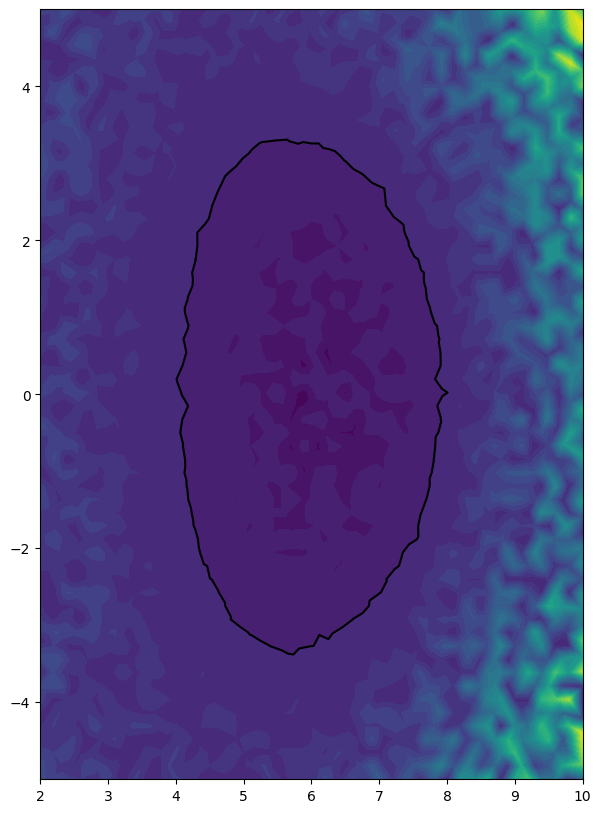

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Assemble non-cut elements...Done!
     Assemble cut elements...Done!


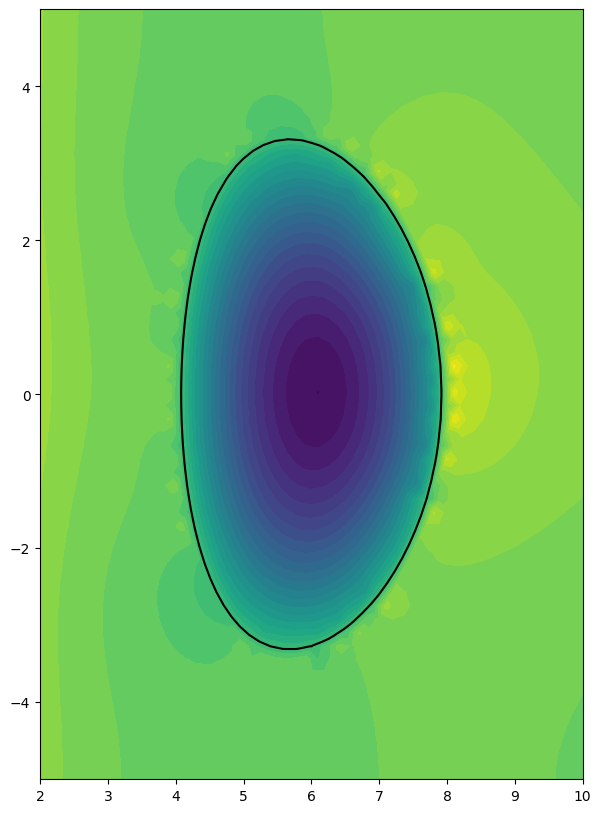

OUTER ITERATION = 1 , INNER ITERATION = 2
     Assemble non-cut elements...Done!
     Assemble cut elements...Done!


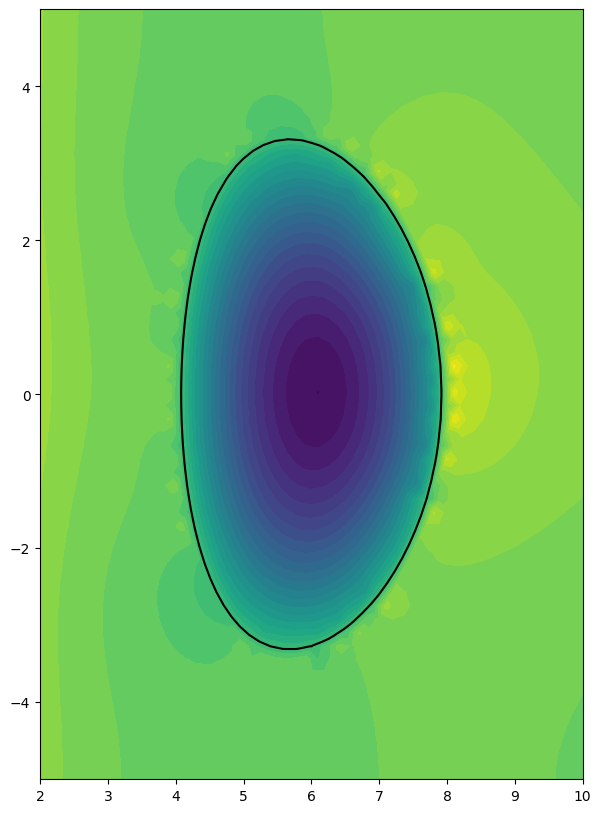

OUTER ITERATION = 2 , INNER ITERATION = 1
     Assemble non-cut elements...Done!
     Assemble cut elements...Done!


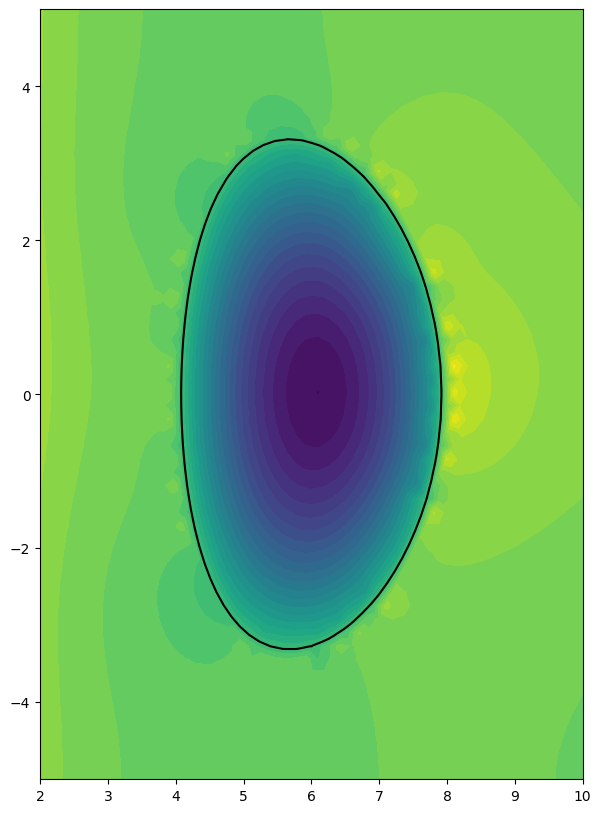

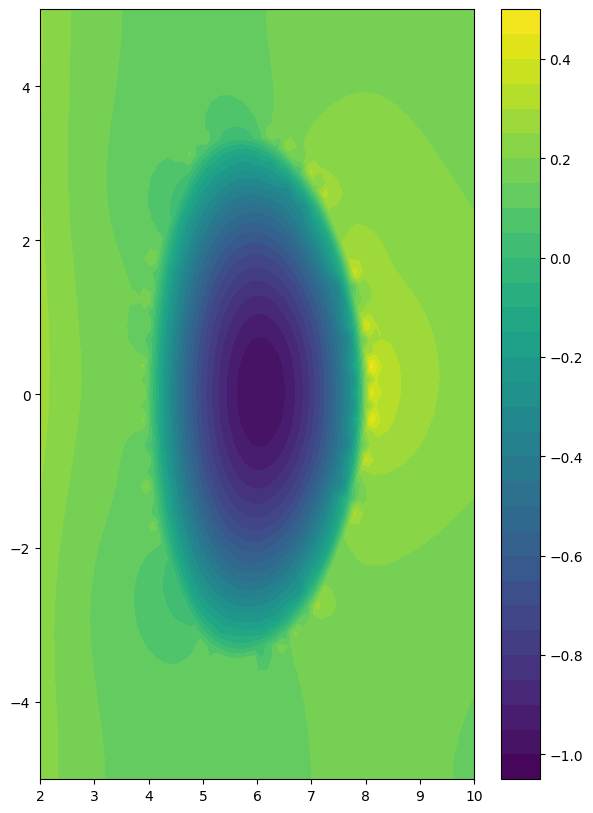

In [1]:
import sys
sys.path.append('/home/elmanyer/Documents/BSC/MasterThesis/Code/EQUILI_PY/')

from src.Equili import *

# LOCATION OF PROBLEM FOLDER
folder_loc = '/home/elmanyer/Documents/BSC/MasterThesis/Code/EQUILI_PY/MESHES/TS-UNSTRUCTURED'
#mesh = '_ULTRACOARSE'
#mesh = '_COARSE'
#mesh = '_COARSE-FINE'
mesh = '_FINE'
#mesh = '_ULTRAFINE'

# MESH INFORMATION:
ElementType = 1     # Element type -> 1: TRIANGLE  ; 2: QUADRILATERAL
ElementOrder = 1    # Element order -> 1: LINEAR  ; 2: QUADRATIC ; 3: CUBIC ...

# VACUUM VESSEL GEOMETRY (ITER):
epsilon = 0.32            # inverse aspect ratio
kappa = 1.7               # elongation
delta = 0.33              # triangularity
Rmax = 8                  # plasma major radius
Rmin = 4                  # plasma minor radius

# SOLUTION CASE
CASE = 'LINEAR'
#CASE = 'NONLINEAR'

QuadratureOrder = 2

##############################################################

# DECLARE OBJECT PROBLEM (folder with ALYA files)
directory = folder_loc + mesh
Problem = Equili(directory,ElementType,ElementOrder,CASE,QuadratureOrder)
Problem.epsilon = epsilon
Problem.kappa = kappa
Problem.delta = delta
Problem.Rmax = Rmax
Problem.Rmin = Rmin
Problem.R0 = (Rmax+Rmin)/2

Problem.ReadMesh()
Problem.ReadEQUILIdata()
Problem.PlasmaEquilibrium() 


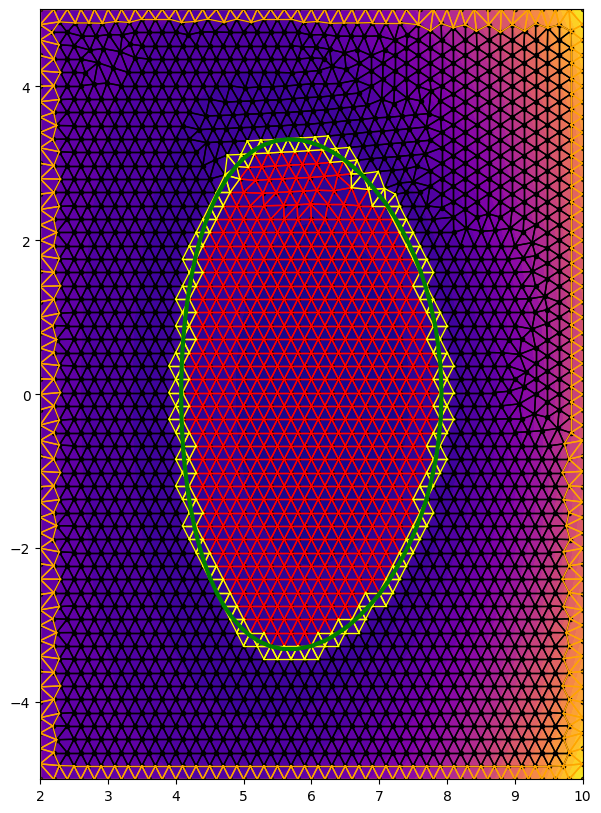

In [2]:
Problem.PlotMeshClassifiedElements()
#Problem.PlotInterfaceNormalVectors()

#Problem.PlotError(Problem.PHI_converged)
